* House price prediction is an important problem in the real estate industry that helps make data-driven investment and pricing decisions.
* Using machine learning algorithms, we can predict a property’s price based on various factors such as location, area, number of bedrooms, building type, and overall condition.
* In this project, we will build a regression model trained on the House Price Prediction Dataset.
* The dataset includes 13 key features:
Id – Record identifier
MSSubClass – Type of dwelling involved in the sale
MSZoning – Zoning classification of the sale
LotArea – Lot size (in square feet)
LotConfig – Lot configuration
BldgType – Type of dwelling
OverallCond – Overall condition rating of the house
YearBuilt – Year the house was originally constructed
YearRemodAdd – Year of remodeling (if any)
Exterior1st – Exterior covering on the house
BsmtFinSF2 – Type 2 finished basement square footage
TotalBsmtSF – Total basement area in square feet
SalePrice – Target variable (price to be predicted)
* By analyzing and modeling these features, we aim to accurately predict house prices and gain deeper insights into real estate market trends.


**Step 1: Importing Libraries and Dataset**

In [2]:
# Import pandas for data manipulation and analysis
import pandas as pd  

# Import matplotlib for data visualization (creating plots and graphs)
import matplotlib.pyplot as plt  

# Import seaborn for advanced statistical visualizations
import seaborn as sns  

# Load the Excel dataset into a pandas DataFrame
dataset = pd.read_excel("/kaggle/input/house-price-prediction-dataset/HousePricePrediction.xlsx")  

# Display the first 5 rows of the dataset to understand its structure
print(dataset.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


After importing the dataset, we use the shape method to view its dimensions.
It displays the total number of rows and columns present in the dataset.

In [3]:
# Display the number of rows and columns in the dataset
dataset.shape

(2919, 13)

**Step 2: Data Preprocessing**

Next, we categorize the features based on their data types — integer, float, and object.
This helps us understand how many numerical and categorical variables are present in the dataset.

In [4]:
# Identify columns with data type 'object' (categorical variables)
obj = (dataset.dtypes == 'object')

# Store all categorical column names in a list
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

# Identify columns with integer data type
int_ = (dataset.dtypes == 'int')

# Store all integer column names in a list
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

# Identify columns with float data type
fl = (dataset.dtypes == 'float')

# Store all float column names in a list
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 4
Integer variables: 6
Float variables: 3


**Step 3: Exploratory Data Analysis**

* Exploratory Data Analysis (EDA) helps in understanding the dataset deeply by uncovering hidden patterns, correlations, and anomalies.
* Before drawing conclusions or building models, it’s essential to visualize and explore all variables.

* Here, we use the Seaborn library to create a heatmap that shows the correlation between different numerical features.

<Axes: >

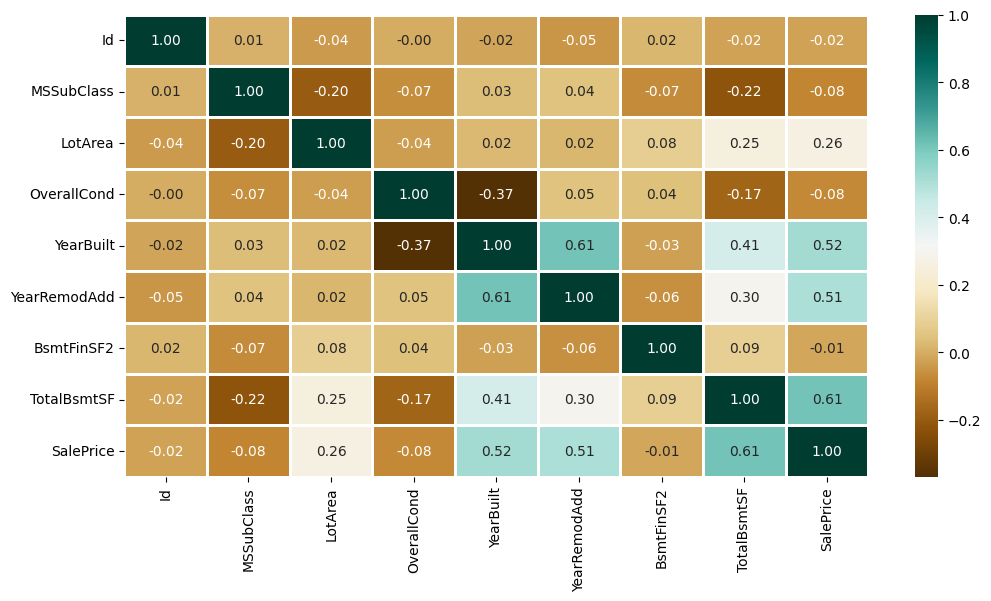

In [5]:
# Select only the numerical columns from the dataset
numerical_dataset = dataset.select_dtypes(include=['number'])

# Set the size of the heatmap figure
plt.figure(figsize=(12, 6))

# Plot a heatmap to visualize the correlation between numerical features
sns.heatmap(numerical_dataset.corr(),
            cmap='BrBG',        # Color scheme for the heatmap
            fmt='.2f',          # Display correlation values with 2 decimal places
            linewidths=2,       # Add space between cells
            annot=True)         # Show correlation values inside the cells


To analyze the different categorical features. Let's draw the barplot.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

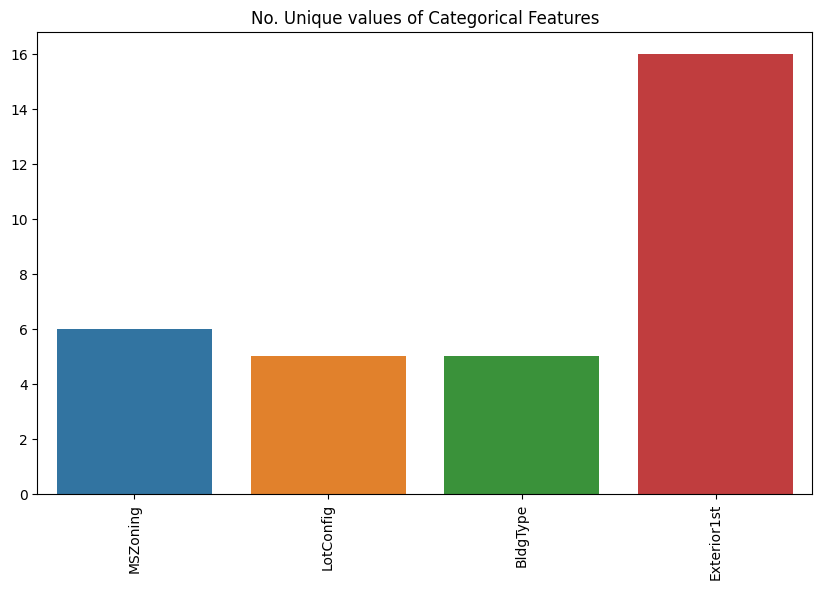

In [6]:
# Create an empty list to store the count of unique values for each categorical column
unique_values = []

# Loop through each categorical column and count its unique values
for col in object_cols:
    unique_values.append(dataset[col].unique().size)

# Set the size of the bar plot
plt.figure(figsize=(10,6))

# Add a title to the plot
plt.title('No. of Unique Values of Categorical Features')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Plot a bar chart showing the number of unique categories for each categorical feature
sns.barplot(x=object_cols, y=unique_values)


The plot indicates that Exterior1st contains around 16 unique categories, while the other features have approximately 6 unique categories each.
To understand the exact distribution of each category, we can plot bar graphs for these four features individually.

/tmp/ipykernel_37/2280538051.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packa

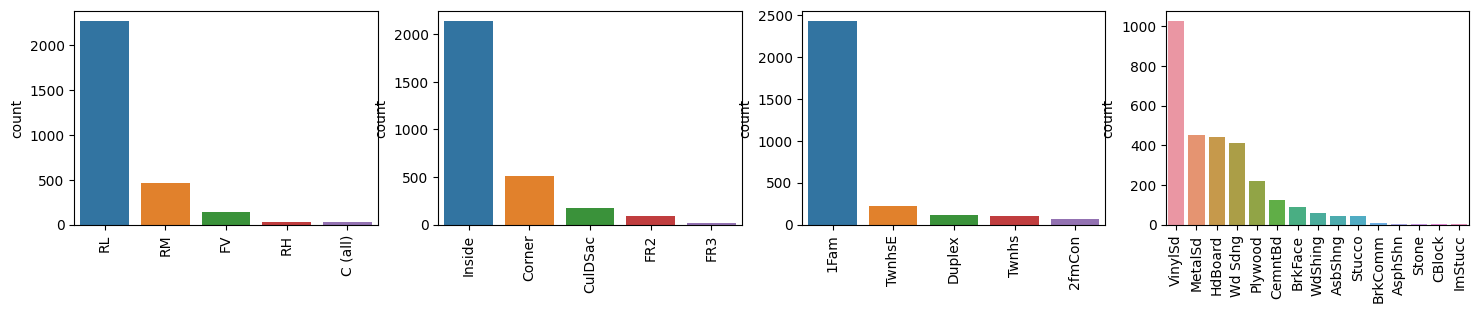

In [7]:
# Set the overall figure size for multiple bar plots
plt.figure(figsize=(18, 36))

# Add a main title for the entire figure
plt.title('Categorical Features: Distribution')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Initialize subplot index
index = 1

# Loop through each categorical column
for col in object_cols:
    # Get the count of each unique value in the column
    y = dataset[col].value_counts()
    
    # Create subplots for each categorical feature
    plt.subplot(11, 4, index)
    
    # Rotate x-axis labels for each subplot
    plt.xticks(rotation=90)
    
    # Plot the distribution of categories using a bar plot
    sns.barplot(x=list(y.index), y=y)
    
    # Move to the next subplot index
    index += 1

**Step 4: Data Cleaning**

* Data Cleaning is the process of improving data quality by removing incorrect, corrupted, or irrelevant information.
* In our dataset, some columns are not essential for model training, so we can safely remove them.
* There are two common approaches to handle missing or null values:
* Remove the column or row if the feature or record is not significant.
* Fill the missing values using methods like mean, mode, 0, or NA (depending on the dataset).
* Since the Id column does not contribute to prediction, we can drop it before training the model.

In [8]:
# Drop the 'Id' column from the dataset as it is not useful for prediction
# axis=1 means we are removing a column (not a row)
# inplace=True updates the original dataset directly
dataset.drop(['Id'], axis=1, inplace=True)


We replace the missing values in the SalePrice column with their mean value.
This helps make the data distribution more balanced and symmetric, improving model performance.

In [9]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean())# Fill missing values in the 'SalePrice' column with the mean of that column
# This helps handle null values and makes the data more uniform for training
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())


Drop records with null values 

In [11]:
new_dataset = dataset.dropna()

Checking features which have null values in the new dataframe (if there are still any).

In [12]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

**Step 5: OneHotEncoder - For Label categorical features**

* One-Hot Encoding is an effective method to convert categorical variables into binary vectors.
* It maps text-based categorical values into numeric format, making them suitable for machine learning algorithms.
* Using OneHotEncoder, we can easily transform object-type columns into integers.
To begin, we first identify all features that have the object data type using a simple loop.

In [15]:
# Import OneHotEncoder to convert categorical data into numerical format
from sklearn.preprocessing import OneHotEncoder

# Identify columns in the dataset that have the 'object' datatype (categorical)
s = (new_dataset.dtypes == 'object')

# Store the names of all categorical columns in a list
object_cols = list(s[s].index)

# Print the names of categorical columns
print("Categorical variables:")
print(object_cols)

# Print the total number of categorical features
print('No. of categorical features:', len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


After identifying all categorical features, we apply One-Hot Encoding to the entire list.
This step converts each category into separate binary columns, allowing the model to interpret categorical data effectively.

In [17]:
# Create an instance of OneHotEncoder
# sparse_output=False returns a dense array instead of a sparse matrix
# handle_unknown='ignore' prevents errors if unseen categories appear
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply OneHotEncoder to all categorical columns and convert the result into a DataFrame
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))

# Match the new DataFrame index with the original dataset
OH_cols.index = new_dataset.index

# Rename columns to their encoded feature names
OH_cols.columns = OH_encoder.get_feature_names_out()

# Drop the original categorical columns from the dataset
df_final = new_dataset.drop(object_cols, axis=1)

# Combine the encoded columns with the remaining dataset
df_final = pd.concat([df_final, OH_cols], axis=1)


**Step 6: Splitting Dataset into Training and Testing**

Next, we split the dataset into X and Y:

* Y represents the target variable — the SalePrice column.

* X includes all the remaining columns (independent features) used to predict the house price.

In [18]:
# Import mean_absolute_error to evaluate model performance
from sklearn.metrics import mean_absolute_error

# Import train_test_split to divide the dataset into training and validation sets
from sklearn.model_selection import train_test_split

# Separate input features (X) and target variable (Y)
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the data into 80% training and 20% validation sets
# random_state=0 ensures the same split each time for reproducibility
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

**Step 7: Model Training and Accuracy**

Since we need to predict continuous values, we’ll use regression models for training.
The models we will apply are:

* SVM (Support Vector Machine)

* Random Forest Regressor

* Linear Regressor

To evaluate performance, we’ll use the Mean Absolute Percentage Error (MAPE) metric from the sklearn library.

**1. Support Vector Machine (SVM)**

Support Vector Machine (SVM) is a supervised machine learning algorithm mainly used for classification, but it can also handle regression tasks.
It works by finding an optimal hyperplane that separates data points in feature space.
The main objective is to maximize the margin between the data points and the hyperplane to improve prediction accuracy.

In [19]:
# Import the SVM module from scikit-learn
from sklearn import svm

# Import Support Vector Classifier (not used here, but commonly used for classification tasks)
from sklearn.svm import SVC

# Import mean_absolute_percentage_error to evaluate model accuracy in percentage terms
from sklearn.metrics import mean_absolute_percentage_error

# Create an instance of the Support Vector Regressor (SVR) model
model_SVR = svm.SVR()

# Train the model using the training data
model_SVR.fit(X_train, Y_train)

# Predict house prices using the validation data
Y_pred = model_SVR.predict(X_valid)

# Print the Mean Absolute Percentage Error (lower is better)
print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


**2. Random Forest Regression**

Random Forest is an ensemble learning algorithm used for both classification and regression tasks.
It builds multiple decision trees during training — each tree is trained on a random subset of the dataset and features, ensuring diversity and reducing overfitting.

For regression problems, the final prediction is obtained by averaging the outputs of all individual trees, making the model more stable and accurate.

In [20]:
# Import RandomForestRegressor for regression-based predictions
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model with 10 decision trees
model_RFR = RandomForestRegressor(n_estimators=10)

# Train the Random Forest model on the training data
model_RFR.fit(X_train, Y_train)

# Predict the house prices using the validation data
Y_pred = model_RFR.predict(X_valid)

# Calculate and display the Mean Absolute Percentage Error (MAPE)
mean_absolute_percentage_error(Y_valid, Y_pred)

0.19457908058640852

**3. Linear Regression**

Linear Regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables.
The goal is to find the best-fitting line that minimizes the difference between the observed and predicted values.

It works by minimizing the sum of squared errors (SSE) between the predicted outputs and actual data points.
This model assumes a linear relationship between the input features and the target variable.

In [21]:
# Import LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
model_LR = LinearRegression()

# Train the model using the training dataset
model_LR.fit(X_train, Y_train)

# Predict house prices using the validation dataset
Y_pred = model_LR.predict(X_valid)

# Print the Mean Absolute Percentage Error to evaluate model performance
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18741683841599877


* From the results, it is evident that the SVM model provides the best accuracy, as its Mean Absolute Error (MAE) is the lowest among all the regression models (approximately 0.18).

* To further improve performance, advanced ensemble learning techniques such as Bagging and Boosting can be applied.
* These methods combine multiple weak models to build a stronger and more accurate predictive model.